# BOSTON HOUSE PRICE PREDICTION

#### This project predicts housing prices using a regression model trained on features like crime rate, number of rooms, and more.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Loading Dataset

In [3]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Handle Missing Values

In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
X = df.drop("MEDV", axis = 1)
y = df["MEDV"]

In [6]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

## Train-test-split

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

## Model training

In [8]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [9]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print("Train R² Score:", r2_score(y_train, y_train_pred))
print("Test R² Score:", r2_score(y_test, y_test_pred))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))

Train R² Score: 0.9728575190862845
Test R² Score: 0.8788144646092922
Test Mean Squared Error: 8.886993774509808


## User inputs

In [13]:
feature_names = X.columns.tolist()
user_values = []
print("Enter values for the following features to predict the house price:\n")
for feature in feature_names:
    while True:
        try:
            value = float(input(f"Enter value for {feature}: "))
            user_values.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")
user_input_array = [user_values]
user_input_imputed = imputer.transform(user_input_array)
predicted_price = model.predict(user_input_imputed)[0]
print("\nPrediction Complete!")
print(f" Estimated House Price: ${predicted_price:.2f}k")

Enter values for the following features to predict the house price:



Enter value for CRIM:  0.00754
Enter value for ZN:  9.0
Enter value for INDUS:  2.31
Enter value for CHAS:  0.0
Enter value for NOX:  0.476
Enter value for RM:  7.453
Enter value for AGE:  60
Enter value for DIS:  4.0543
Enter value for RAD:  1
Enter value for TAX:  356
Enter value for PTRATIO:  12.4
Enter value for B:  453.50
Enter value for LSTAT:  5.76



Prediction Complete!
 Estimated House Price: $39.02k


C:\Users\AAA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\AAA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Feature Importance Visualization

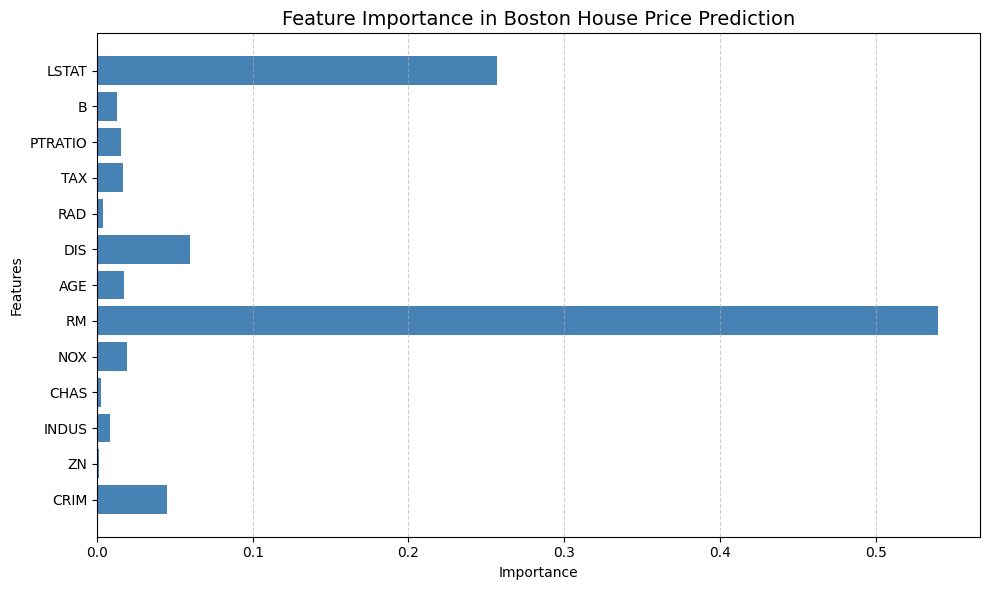

In [11]:
feature_names = X.columns
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='steelblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Boston House Price Prediction", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Conclusion

- Random Forest Regressor used to train model.
- All missing data handled and inputs cleaned.
- Users can predict house prices based on feature values.
